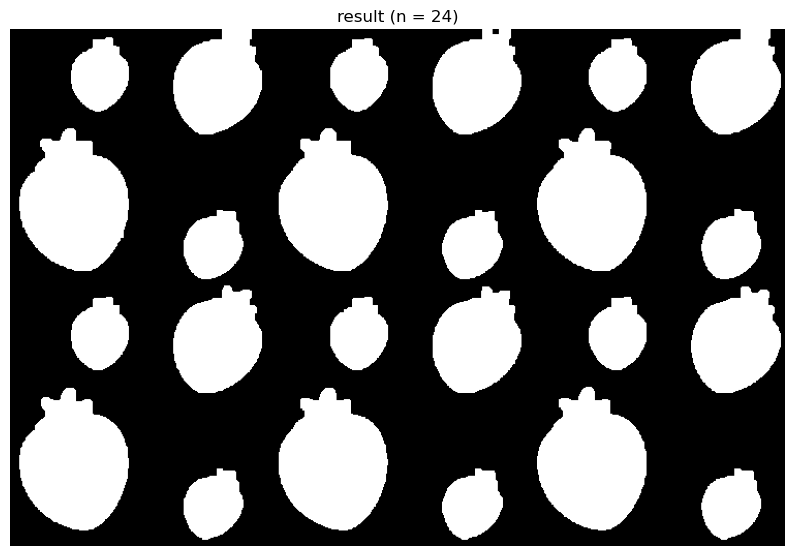

num: 24


In [99]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage.morphology import remove_small_objects, binary_opening, binary_closing


def display_image(image, title="Image", cmap='gray'):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def segment_strawberries(image_path, min_object_size=1000):
    # 读取图像
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Error reading image from path: {image_path}")
        return None, 0  


    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    
    lower_red1 = np.array([0, 120, 70])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 120, 70])
    upper_red2 = np.array([180, 255, 255])

    mask_red1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
    mask_red = mask_red1 + mask_red2  # 合并红色区域

    
    lower_green = np.array([35, 40, 40])   # 绿色的HSV范围
    upper_green = np.array([90, 255, 255])  
    mask_green = cv2.inRange(hsv_image, lower_green, upper_green)

 
    mask = mask_red + mask_green

    
    kernel = np.ones((6, 6), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)   
    
    mask = remove_small_objects(mask.astype(bool), min_size=min_object_size)

 
    labeled_image = measure.label(mask)
    num_objects = np.max(labeled_image)  

    # 显示结果
    display_image(mask, title=f'result (n = {num_objects})')

    return mask, num_objects

# 运行草莓分割
image_path = r"D:\COMP9517_25T1_Lab4_Images\Strawberries.jpg" 
segmented_image, num_objects = segment_strawberries(image_path)

# 输出计数结果
if segmented_image is not None:
    print(f"num: {num_objects}") 
else:
    print("failed")


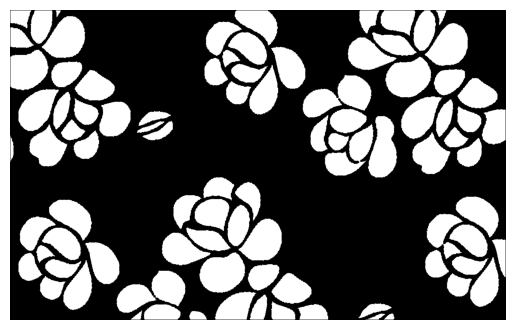

number: 91


In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_light_blue_only(image_path, lower_hsv, upper_hsv, min_object_size=100):
   
    img = cv2.imread(image_path)
    if img is None:
        print(f"FAILED: {image_path}")
        return None, 0
    
    
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    
    mask = cv2.inRange(hsv_img, lower_hsv, upper_hsv)
    
    
    kernel = np.ones((5,5), np.uint8)  
    morphed_img = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)  

    
    binary_mask = np.ones_like(mask)
    binary_mask[0, :] = 0  
    binary_mask[-1, :] = 0  
    binary_mask[:, 0] = 0  
    binary_mask[:, -1] = 0 

  
    boundary_removed = cv2.bitwise_and(morphed_img, morphed_img, mask=binary_mask)

  
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(boundary_removed)
    
    final_img = np.zeros_like(morphed_img)
    num_objects = 0
    
    
    for i in range(1, num_labels):  
        x, y, w, h, area = stats[i]
        if area >= min_object_size:
            final_img[labels == i] = 255
            num_objects += 1

   
    plt.imshow(final_img, cmap='gray')
    plt.axis('off')
    plt.show()

    return final_img, num_objects

image_path = "D:\\COMP9517_25T1_Lab4_Images\\leaves.jpg" 


lower_hsv = np.array([90, 150, 180])  # 浅蓝色的HSV下限
upper_hsv = np.array([110, 180, 255])  # 浅蓝色的HSV上限
min_object_size = 100  # 保留的最小物体大小


segmented_image, num_objects = segment_light_blue_only(image_path, lower_hsv, upper_hsv, min_object_size)


print(f"number: {num_objects}")


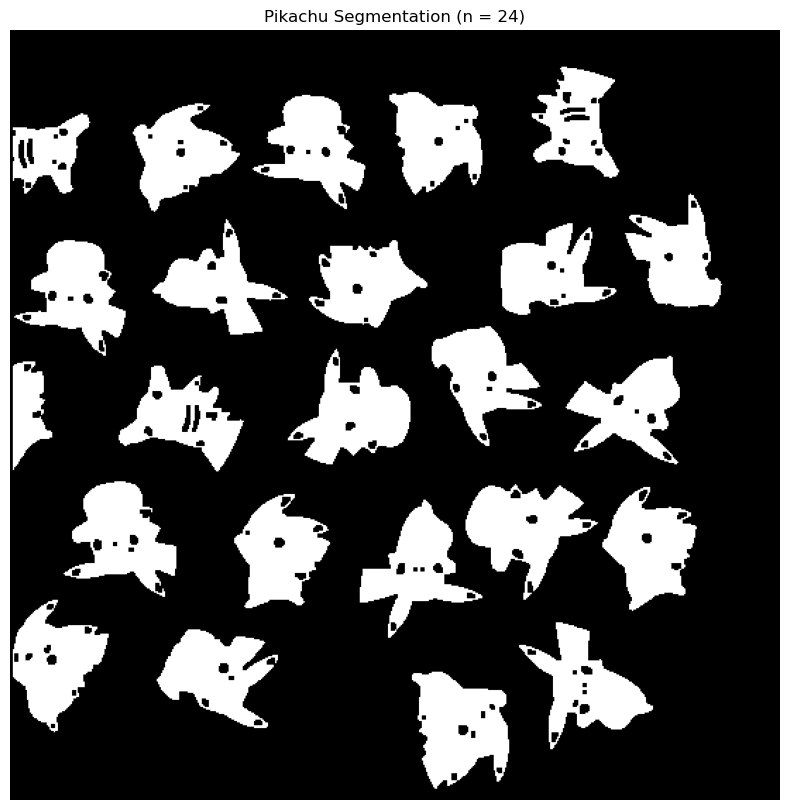

Number of objects in Pikachu image: 24


In [116]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from skimage.morphology import remove_small_objects, closing, square
from skimage.segmentation import clear_border

def display_image(image, title="Image", cmap='gray'):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()


def segment_pikachu(image_path, threshold=127, min_object_size=1000):
    # 1. Read the image and convert to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if image is None:
        print(f"Error reading image from path: {image_path}")
        return None, 0  

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 
    _, thresholded = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)

 
    closed_image = closing(thresholded, square(3))

    
    cleared_image = clear_border(closed_image)

   
    filtered_image = remove_small_objects(cleared_image.astype(bool), min_size=min_object_size).astype(np.uint8) * 255


    labeled_image = measure.label(filtered_image)
    num_objects = np.max(labeled_image)  # Count the number of objects

   
    display_image(filtered_image, title=f'Pikachu Segmentation (n = {num_objects})')

    return filtered_image, num_objects


image_path = r"D:\COMP9517_25T1_Lab4_Images\Pikachus.jpg" 
segmented_image, num_objects = segment_pikachu(image_path)

# Print the number of objects
if segmented_image is not None:
    print(f"Number of objects in Pikachu image: {num_objects}")
else:
    print("Pikachu segmentation failed.")
